# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determining the optimal value of lambda for ridge and lasso regression.

In [1]:
# import the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
price = pd.read_csv("train.csv") # read the data

In [3]:
price.shape

(1460, 81)

In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
null_perc = round(price.isnull().mean()*100,2)
null_perc   

# The null percentage of columns tells us which are the columns to drop immediatly.

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [6]:
# Lets see the columns with null percentage greater than 45% and drop them immediatly,
# as high null value percentage won't help our final model. 

null_perc[null_perc > 45]

Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [7]:
price= price.drop(['FireplaceQu', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], 1) 

In [8]:
null_perc = round(price.isnull().mean()*100,2)
null_perc[null_perc != 0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [9]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
cat_vars = price.select_dtypes(include = 'object')

In [11]:
cat_vars.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
num_vars = price.select_dtypes(include = ['int64', 'float64'])

In [13]:
num_vars.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
for col in cat_vars.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ') # value counts of all the categorical columns
    display(cat_vars[col].value_counts())

----------------------------------------MSZoning---------------------------------------- - 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

----------------------------------------Street---------------------------------------- - 

Pave    1454
Grvl       6
Name: Street, dtype: int64

----------------------------------------LotShape---------------------------------------- - 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

----------------------------------------LandContour---------------------------------------- - 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

----------------------------------------Utilities---------------------------------------- - 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

----------------------------------------LotConfig---------------------------------------- - 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

----------------------------------------LandSlope---------------------------------------- - 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

----------------------------------------Neighborhood---------------------------------------- - 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

----------------------------------------Condition1---------------------------------------- - 

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

----------------------------------------Condition2---------------------------------------- - 

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

----------------------------------------BldgType---------------------------------------- - 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

----------------------------------------HouseStyle---------------------------------------- - 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

----------------------------------------RoofStyle---------------------------------------- - 

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

----------------------------------------RoofMatl---------------------------------------- - 

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

----------------------------------------Exterior1st---------------------------------------- - 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

----------------------------------------Exterior2nd---------------------------------------- - 

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

----------------------------------------MasVnrType---------------------------------------- - 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

----------------------------------------ExterQual---------------------------------------- - 

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

----------------------------------------ExterCond---------------------------------------- - 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

----------------------------------------Foundation---------------------------------------- - 

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

----------------------------------------BsmtQual---------------------------------------- - 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

----------------------------------------BsmtCond---------------------------------------- - 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

----------------------------------------BsmtExposure---------------------------------------- - 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

----------------------------------------BsmtFinType1---------------------------------------- - 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

----------------------------------------BsmtFinType2---------------------------------------- - 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

----------------------------------------Heating---------------------------------------- - 

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

----------------------------------------HeatingQC---------------------------------------- - 

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

----------------------------------------CentralAir---------------------------------------- - 

Y    1365
N      95
Name: CentralAir, dtype: int64

----------------------------------------Electrical---------------------------------------- - 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

----------------------------------------KitchenQual---------------------------------------- - 

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

----------------------------------------Functional---------------------------------------- - 

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

----------------------------------------GarageType---------------------------------------- - 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

----------------------------------------GarageFinish---------------------------------------- - 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

----------------------------------------GarageQual---------------------------------------- - 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

----------------------------------------GarageCond---------------------------------------- - 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

----------------------------------------PavedDrive---------------------------------------- - 

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

----------------------------------------SaleType---------------------------------------- - 

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

----------------------------------------SaleCondition---------------------------------------- - 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [15]:
for col in cat_vars.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ') # percentage value counts
    display(cat_vars[col].value_counts(normalize = True))

----------------------------------------MSZoning---------------------------------------- - 

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

----------------------------------------Street---------------------------------------- - 

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

----------------------------------------LotShape---------------------------------------- - 

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

----------------------------------------LandContour---------------------------------------- - 

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

----------------------------------------Utilities---------------------------------------- - 

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

----------------------------------------LotConfig---------------------------------------- - 

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

----------------------------------------LandSlope---------------------------------------- - 

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

----------------------------------------Neighborhood---------------------------------------- - 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

----------------------------------------Condition1---------------------------------------- - 

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

----------------------------------------Condition2---------------------------------------- - 

Norm      0.989726
Feedr     0.004110
PosN      0.001370
RRNn      0.001370
Artery    0.001370
PosA      0.000685
RRAe      0.000685
RRAn      0.000685
Name: Condition2, dtype: float64

----------------------------------------BldgType---------------------------------------- - 

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

----------------------------------------HouseStyle---------------------------------------- - 

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

----------------------------------------RoofStyle---------------------------------------- - 

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

----------------------------------------RoofMatl---------------------------------------- - 

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
ClyTile    0.000685
Roll       0.000685
Metal      0.000685
Membran    0.000685
Name: RoofMatl, dtype: float64

----------------------------------------Exterior1st---------------------------------------- - 

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

----------------------------------------Exterior2nd---------------------------------------- - 

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

----------------------------------------MasVnrType---------------------------------------- - 

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

----------------------------------------ExterQual---------------------------------------- - 

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

----------------------------------------ExterCond---------------------------------------- - 

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

----------------------------------------Foundation---------------------------------------- - 

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

----------------------------------------BsmtQual---------------------------------------- - 

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

----------------------------------------BsmtCond---------------------------------------- - 

TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64

----------------------------------------BsmtExposure---------------------------------------- - 

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

----------------------------------------BsmtFinType1---------------------------------------- - 

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

----------------------------------------BsmtFinType2---------------------------------------- - 

Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64

----------------------------------------Heating---------------------------------------- - 

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

----------------------------------------HeatingQC---------------------------------------- - 

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

----------------------------------------CentralAir---------------------------------------- - 

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

----------------------------------------Electrical---------------------------------------- - 

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

----------------------------------------KitchenQual---------------------------------------- - 

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

----------------------------------------Functional---------------------------------------- - 

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

----------------------------------------GarageType---------------------------------------- - 

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

----------------------------------------GarageFinish---------------------------------------- - 

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64

----------------------------------------GarageQual---------------------------------------- - 

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

----------------------------------------GarageCond---------------------------------------- - 

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64

----------------------------------------PavedDrive---------------------------------------- - 

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

----------------------------------------SaleType---------------------------------------- - 

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

----------------------------------------SaleCondition---------------------------------------- - 

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [16]:
skewed_vars = cat_vars[['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 
                        'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 
                        'Electrical','Functional', 'GarageQual', 'GarageCond', 'PavedDrive','SaleType'] ]   
# skewed columns

In [17]:
price = price.drop(skewed_vars, 1) # drop the skewed variables

In [18]:
cat_vars = price.select_dtypes(include = 'object')
cat_vars.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [19]:
for col in cat_vars.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(cat_vars[col].value_counts(normalize = True))

----------------------------------------MSZoning---------------------------------------- - 

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

----------------------------------------LotShape---------------------------------------- - 

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

----------------------------------------LotConfig---------------------------------------- - 

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

----------------------------------------Neighborhood---------------------------------------- - 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

----------------------------------------BldgType---------------------------------------- - 

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

----------------------------------------HouseStyle---------------------------------------- - 

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

----------------------------------------RoofStyle---------------------------------------- - 

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

----------------------------------------Exterior1st---------------------------------------- - 

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

----------------------------------------Exterior2nd---------------------------------------- - 

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

----------------------------------------MasVnrType---------------------------------------- - 

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

----------------------------------------ExterQual---------------------------------------- - 

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

----------------------------------------Foundation---------------------------------------- - 

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

----------------------------------------BsmtQual---------------------------------------- - 

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

----------------------------------------BsmtExposure---------------------------------------- - 

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

----------------------------------------BsmtFinType1---------------------------------------- - 

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

----------------------------------------HeatingQC---------------------------------------- - 

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

----------------------------------------KitchenQual---------------------------------------- - 

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

----------------------------------------GarageType---------------------------------------- - 

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

----------------------------------------GarageFinish---------------------------------------- - 

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64

----------------------------------------SaleCondition---------------------------------------- - 

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [20]:
cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LotConfig      1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   BldgType       1460 non-null   object
 5   HouseStyle     1460 non-null   object
 6   RoofStyle      1460 non-null   object
 7   Exterior1st    1460 non-null   object
 8   Exterior2nd    1460 non-null   object
 9   MasVnrType     1452 non-null   object
 10  ExterQual      1460 non-null   object
 11  Foundation     1460 non-null   object
 12  BsmtQual       1423 non-null   object
 13  BsmtExposure   1422 non-null   object
 14  BsmtFinType1   1423 non-null   object
 15  HeatingQC      1460 non-null   object
 16  KitchenQual    1460 non-null   object
 17  GarageType     1379 non-null   object
 18  GarageFinish   1379 non-null

In [21]:
cat_vars.isnull().sum()

MSZoning          0
LotShape          0
LotConfig         0
Neighborhood      0
BldgType          0
HouseStyle        0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
HeatingQC         0
KitchenQual       0
GarageType       81
GarageFinish     81
SaleCondition     0
dtype: int64

In [22]:
# Fill the NAN cells with mode.
price.MasVnrType = price.MasVnrType.fillna(price.MasVnrType.mode()[0])
price.BsmtQual = price.BsmtQual.fillna(price.BsmtQual.mode()[0])
price.BsmtExposure = price.BsmtExposure.fillna(price.BsmtExposure.mode()[0])
price.BsmtFinType1 = price.BsmtFinType1.fillna(price.BsmtFinType1.mode()[0])
price.GarageType = price.GarageType.fillna(price.GarageType.mode()[0])
price.GarageFinish = price.GarageFinish.fillna(price.GarageFinish.mode()[0])

In [23]:
price[cat_vars.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LotConfig      1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   BldgType       1460 non-null   object
 5   HouseStyle     1460 non-null   object
 6   RoofStyle      1460 non-null   object
 7   Exterior1st    1460 non-null   object
 8   Exterior2nd    1460 non-null   object
 9   MasVnrType     1460 non-null   object
 10  ExterQual      1460 non-null   object
 11  Foundation     1460 non-null   object
 12  BsmtQual       1460 non-null   object
 13  BsmtExposure   1460 non-null   object
 14  BsmtFinType1   1460 non-null   object
 15  HeatingQC      1460 non-null   object
 16  KitchenQual    1460 non-null   object
 17  GarageType     1460 non-null   object
 18  GarageFinish   1460 non-null

In [24]:
cat_vars = price.select_dtypes(include = 'object')

In [25]:
cat_vars.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleCondition    0
dtype: int64

In [26]:
for col in cat_vars.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(cat_vars[col].value_counts(normalize = True))

----------------------------------------MSZoning---------------------------------------- - 

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

----------------------------------------LotShape---------------------------------------- - 

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

----------------------------------------LotConfig---------------------------------------- - 

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

----------------------------------------Neighborhood---------------------------------------- - 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

----------------------------------------BldgType---------------------------------------- - 

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

----------------------------------------HouseStyle---------------------------------------- - 

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

----------------------------------------RoofStyle---------------------------------------- - 

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

----------------------------------------Exterior1st---------------------------------------- - 

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

----------------------------------------Exterior2nd---------------------------------------- - 

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

----------------------------------------MasVnrType---------------------------------------- - 

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

----------------------------------------ExterQual---------------------------------------- - 

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

----------------------------------------Foundation---------------------------------------- - 

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

----------------------------------------BsmtQual---------------------------------------- - 

TA    0.469863
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

----------------------------------------BsmtExposure---------------------------------------- - 

No    0.678767
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

----------------------------------------BsmtFinType1---------------------------------------- - 

Unf    0.319863
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

----------------------------------------HeatingQC---------------------------------------- - 

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

----------------------------------------KitchenQual---------------------------------------- - 

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

----------------------------------------GarageType---------------------------------------- - 

Attchd     0.651370
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

----------------------------------------GarageFinish---------------------------------------- - 

Unf    0.469863
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

----------------------------------------SaleCondition---------------------------------------- - 

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

## Modifications On Categorical variables:

In [27]:
# Define the changes to be made to 'MSZoning' column and apply the changes
def Change_MSZoning(x):
    if x == 'RL':
        return 'RL'
    elif x == 'RM':
        return 'RM'
    else: 
        return 'Others'

price.MSZoning = price.MSZoning.apply(Change_MSZoning)

In [28]:
def Change_LotShape(x):
    if x == 'Reg':
        return 'Reg'
    elif x == 'IR1':
        return 'IR1'
    else: 
        return 'Others'

price.LotShape = price.LotShape.apply(Change_LotShape)

In [29]:
def Change_Neighborhood(x):
    if x == 'NAmes':
        return 'NAmes'
    elif x == 'CollgCr':
        return 'CollgCr'
    elif x == 'OldTown':
        return 'OldTown'
    elif x == 'Edwards':
        return 'Edwards'
    else: 
        return 'Others'

price.Neighborhood = price.Neighborhood.apply(Change_Neighborhood)

In [30]:
def Change_BldgType(x):
    if x == '1Fam':
        return '1Fam'
    elif x == 'TwnhsE':
        return 'TwnhsE'
    else: 
        return 'Others'

price.BldgType = price.BldgType.apply(Change_BldgType)


In [31]:
def Change_HouseStyle(x):
    if x == '1Story':
        return '1Story'
    elif x == '2Story':
        return '2Story'
    elif x == '1.5Fin':
        return '1.5Fin'
    else: 
        return 'Others'

price.HouseStyle = price.HouseStyle.apply(Change_HouseStyle)

In [32]:

def Change_RoofStyle(x):
    if x == 'Gable':
        return 'Gable'
    elif x == 'Hip':
        return 'Hip'
    else: 
        return 'Others'

def Change_Exterior1st(x):
    if x == 'VinylSd':
        return 'VinylSd'
    elif x == 'HdBoard':
        return 'HdBoard'
    elif x == 'MetalSd':
        return 'MetalSd'
    elif x == 'Wd Sdng':
        return 'WdSdng'
    else: 
        return 'Others'

def Change_ExterQual(x):
    if x == 'TA':
        return 'TA'
    elif x == 'Gd':
        return 'Gd'
    else: 
        return 'Others'

def Change_Foundation(x):
    if x == 'PConc':
        return 'PConc'
    elif x == 'CBlock':
        return 'CBlock'
    else: 
        return 'Others'

def Change_BsmtQual(x):
    if x == 'TA':
        return 'TA'
    elif x == 'Gd':
        return 'Gd'
    else: 
        return 'Others'

def Change_HeatingQC(x):
    if x == 'Ex':
        return 'Ex'
    elif x == 'TA':
        return 'TA'
    elif x == 'Gd':
        return 'Gd'
    else: 
        return 'Others'

def Change_KitchenQual(x):
    if x == 'TA':
        return 'TA'
    elif x == 'Gd':
        return 'Gd'
    else: 
        return 'Others'

def Change_GarageType(x):
    if x == 'Attchd':
        return 'Attchd'
    elif x == 'Detchd':
        return 'Detchd'
    else: 
        return 'Others'

def Change_SaleCondition(x):
    if x == 'Normal':
        return 'Normal'
    elif x == 'Partial':
        return 'Partial'
    else: 
        return 'Others'



price.RoofStyle = price.RoofStyle.apply(Change_RoofStyle)
price.Exterior1st = price.Exterior1st.apply(Change_Exterior1st)
price.ExterQual = price.ExterQual.apply(Change_ExterQual)
price.Foundation = price.Foundation.apply(Change_Foundation)
price.BsmtQual = price.BsmtQual.apply(Change_BsmtQual)
price.HeatingQC = price.HeatingQC.apply(Change_HeatingQC)
price.KitchenQual = price.KitchenQual.apply(Change_KitchenQual)
price.GarageType = price.GarageType.apply(Change_GarageType)
price.SaleCondition = price.SaleCondition.apply(Change_SaleCondition)




In [33]:

def Change_Exterior2nd(x):
    if x == 'VinylSd':
        return 'VinylSd'
    elif x == 'HdBoard':
        return 'HdBoard'
    elif x == 'MetalSd':
        return 'MetalSd'
    elif x == 'Wd Sdng':
        return 'WdSdng'
    elif x == 'Plywood':
        return 'Plywood'
    else: 
        return 'Others'
    
price.Exterior2nd = price.Exterior2nd.apply(Change_Exterior2nd)


In [34]:
def Change_LotConfig(x):
    if x == 'Inside':
        return 'Inside'
    elif x == 'Corner':
        return 'Corner'
    else: 
        return 'Others'
    
price.LotConfig = price.LotConfig.apply(Change_LotConfig)


In [35]:
cat_vars = price.select_dtypes(include = 'object')

for col in cat_vars.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(cat_vars[col].value_counts(normalize = True))

----------------------------------------MSZoning---------------------------------------- - 

RL        0.788356
RM        0.149315
Others    0.062329
Name: MSZoning, dtype: float64

----------------------------------------LotShape---------------------------------------- - 

Reg       0.633562
IR1       0.331507
Others    0.034932
Name: LotShape, dtype: float64

----------------------------------------LotConfig---------------------------------------- - 

Inside    0.720548
Corner    0.180137
Others    0.099315
Name: LotConfig, dtype: float64

----------------------------------------Neighborhood---------------------------------------- - 

Others     0.597260
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Name: Neighborhood, dtype: float64

----------------------------------------BldgType---------------------------------------- - 

1Fam      0.835616
Others    0.086301
TwnhsE    0.078082
Name: BldgType, dtype: float64

----------------------------------------HouseStyle---------------------------------------- - 

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
Others    0.092466
Name: HouseStyle, dtype: float64

----------------------------------------RoofStyle---------------------------------------- - 

Gable     0.781507
Hip       0.195890
Others    0.022603
Name: RoofStyle, dtype: float64

----------------------------------------Exterior1st---------------------------------------- - 

VinylSd    0.352740
Others     0.203425
HdBoard    0.152055
MetalSd    0.150685
WdSdng     0.141096
Name: Exterior1st, dtype: float64

----------------------------------------Exterior2nd---------------------------------------- - 

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
WdSdng     0.134932
Others     0.134247
Plywood    0.097260
Name: Exterior2nd, dtype: float64

----------------------------------------MasVnrType---------------------------------------- - 

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

----------------------------------------ExterQual---------------------------------------- - 

TA        0.620548
Gd        0.334247
Others    0.045205
Name: ExterQual, dtype: float64

----------------------------------------Foundation---------------------------------------- - 

PConc     0.443151
CBlock    0.434247
Others    0.122603
Name: Foundation, dtype: float64

----------------------------------------BsmtQual---------------------------------------- - 

TA        0.469863
Gd        0.423288
Others    0.106849
Name: BsmtQual, dtype: float64

----------------------------------------BsmtExposure---------------------------------------- - 

No    0.678767
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

----------------------------------------BsmtFinType1---------------------------------------- - 

Unf    0.319863
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

----------------------------------------HeatingQC---------------------------------------- - 

Ex        0.507534
TA        0.293151
Gd        0.165068
Others    0.034247
Name: HeatingQC, dtype: float64

----------------------------------------KitchenQual---------------------------------------- - 

TA        0.503425
Gd        0.401370
Others    0.095205
Name: KitchenQual, dtype: float64

----------------------------------------GarageType---------------------------------------- - 

Attchd    0.651370
Detchd    0.265068
Others    0.083562
Name: GarageType, dtype: float64

----------------------------------------GarageFinish---------------------------------------- - 

Unf    0.469863
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

----------------------------------------SaleCondition---------------------------------------- - 

Normal     0.820548
Others     0.093836
Partial    0.085616
Name: SaleCondition, dtype: float64

In [36]:
cat_vars.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [37]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(price[['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']], drop_first=True)

# Adding the results to the master dataframe
price = pd.concat([price, dummy1], axis=1)

In [38]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Others,SaleCondition_Partial
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,0,1,0,0,0
1,2,20,RL,80.0,9600,Reg,Others,Others,1Fam,1Story,...,0,0,0,1,0,0,1,0,0,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,0,1,0,0,0
3,4,70,RL,60.0,9550,IR1,Corner,Others,1Fam,2Story,...,0,0,0,0,1,0,0,1,1,0
4,5,60,RL,84.0,14260,IR1,Others,Others,1Fam,2Story,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# Drop the categorical columns after creating dummines
price = price.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition'], axis = 1)

In [40]:
price.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,...,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Others,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,BrkFace,196.0,...,0,0,0,0,0,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,None,0.0,...,0,0,0,1,0,0,1,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,BrkFace,162.0,...,0,0,0,0,0,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,None,0.0,...,0,0,0,0,1,0,0,1,1,0
4,5,60,84.0,14260,8,5,2000,2000,BrkFace,350.0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   MSSubClass             1460 non-null   int64  
 2   LotFrontage            1201 non-null   float64
 3   LotArea                1460 non-null   int64  
 4   OverallQual            1460 non-null   int64  
 5   OverallCond            1460 non-null   int64  
 6   YearBuilt              1460 non-null   int64  
 7   YearRemodAdd           1460 non-null   int64  
 8   MasVnrType             1460 non-null   object 
 9   MasVnrArea             1452 non-null   float64
 10  BsmtFinSF1             1460 non-null   int64  
 11  BsmtFinSF2             1460 non-null   int64  
 12  BsmtUnfSF              1460 non-null   int64  
 13  TotalBsmtSF            1460 non-null   int64  
 14  1stFlrSF               1460 non-null   int64  
 15  2ndF

In [42]:
col = num_vars.columns
col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [43]:
col = col[1:]

## Outlier Treatment

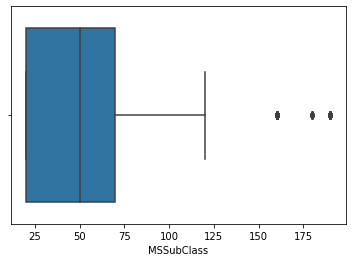

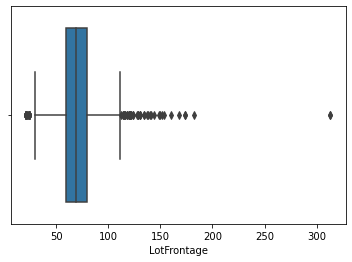

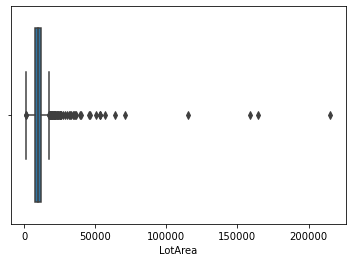

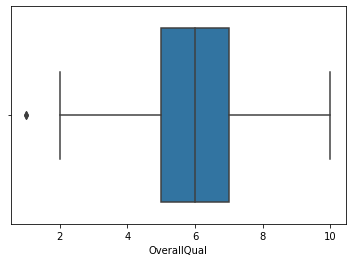

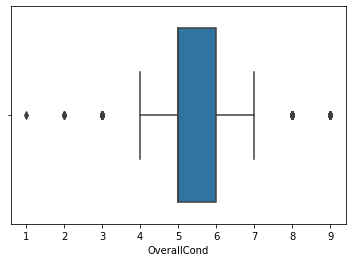

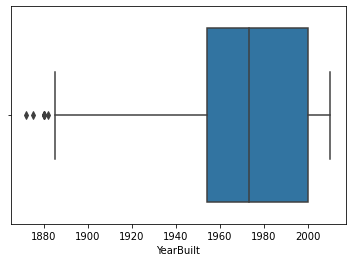

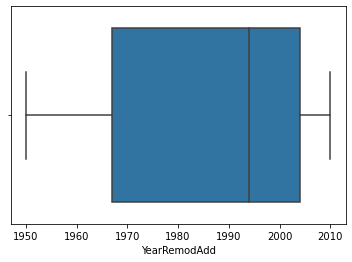

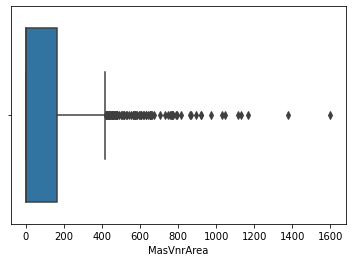

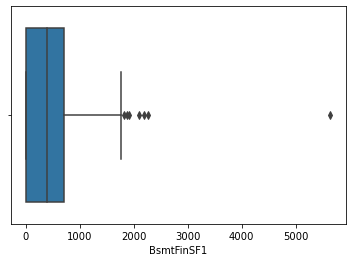

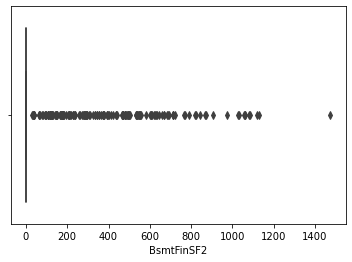

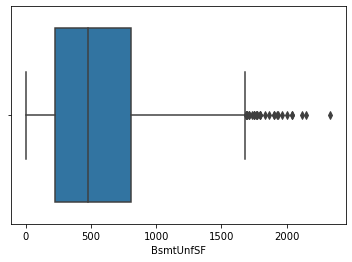

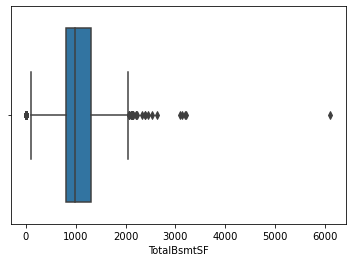

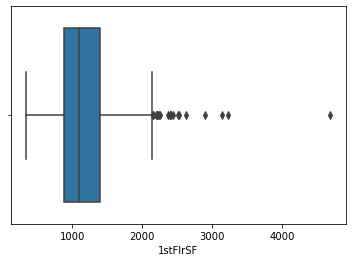

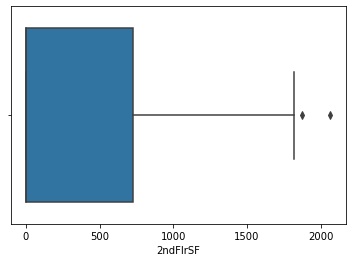

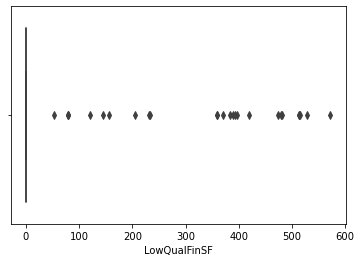

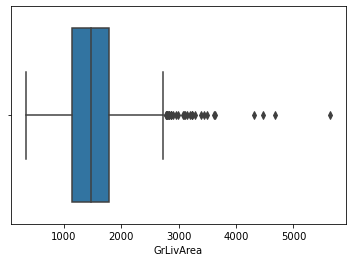

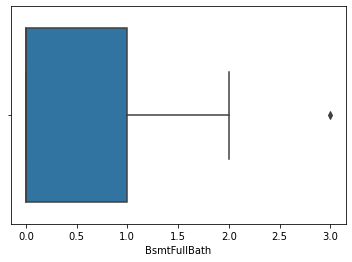

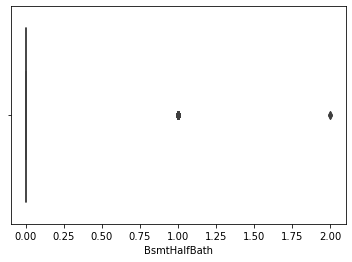

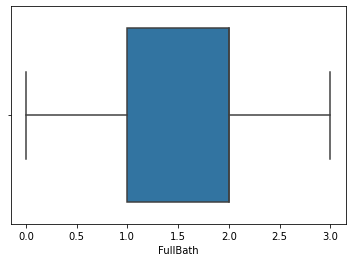

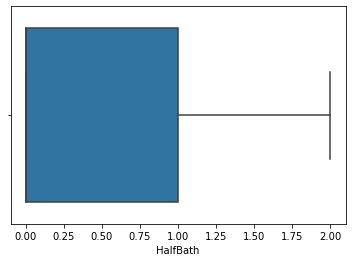

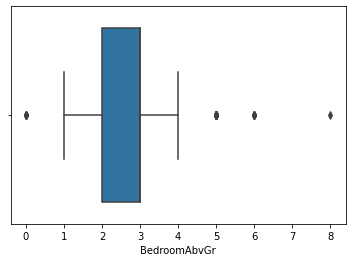

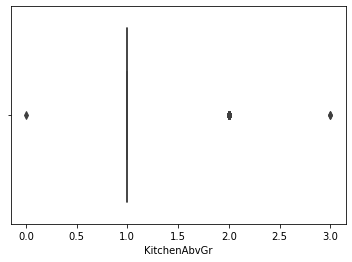

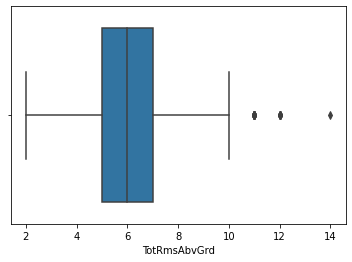

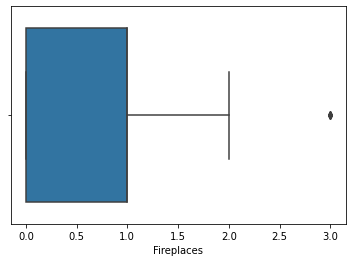

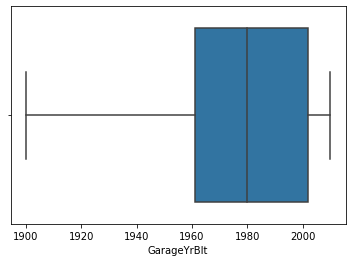

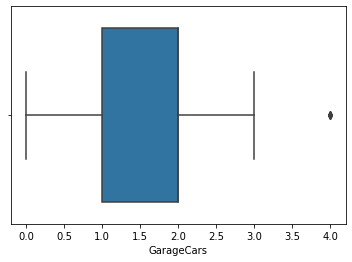

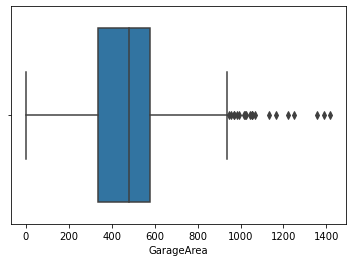

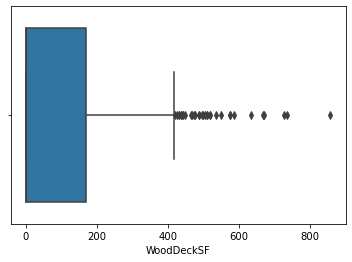

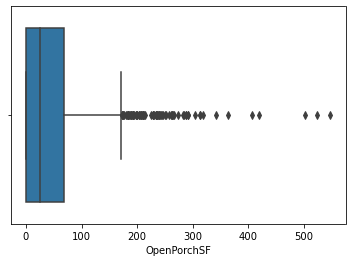

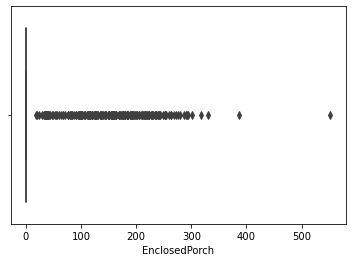

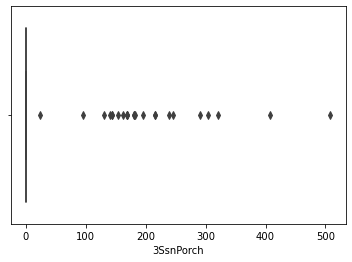

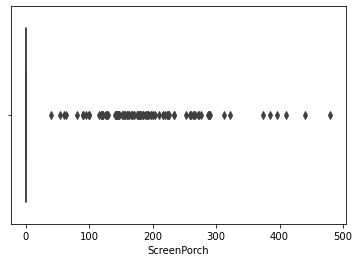

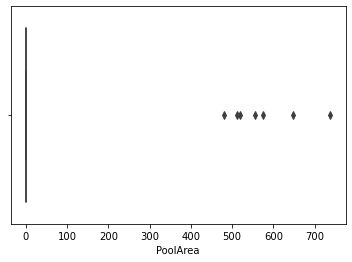

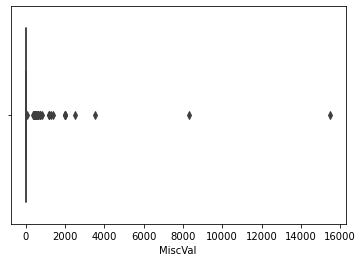

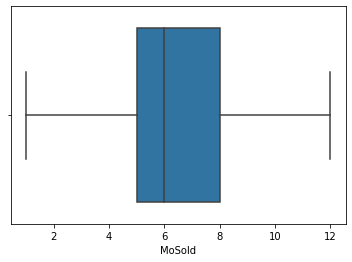

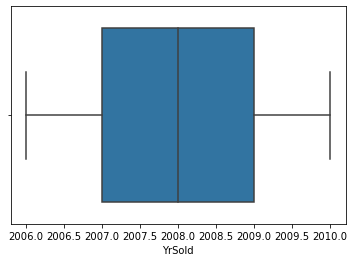

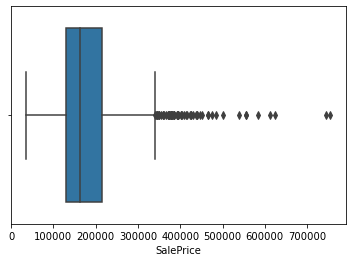

In [44]:
for c in col:
    sns.boxplot(price[c])  # Boxplots for all neumerical variables
    plt.show();

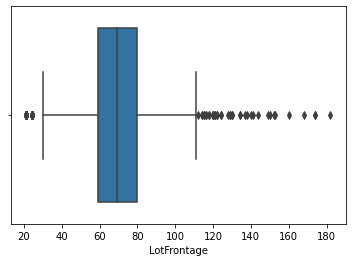

In [45]:
# Outlier Treatment dome on required variables
Q1 = price.LotFrontage.quantile(0.05)
Q3 = price.LotFrontage.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.LotFrontage >= Q1 - 1.5*IQR) & (price.LotFrontage <= Q3 + 1.5*IQR)]

sns.boxplot(price.LotFrontage)

In [46]:
Q1 = price.LotArea.quantile(0.05)
Q3 = price.LotArea.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.LotArea >= Q1 - 1.5*IQR) & (price.LotArea <= Q3 + 1.5*IQR)]

Q1 = price.MasVnrArea.quantile(0.05)
Q3 = price.MasVnrArea.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.MasVnrArea >= Q1 - 1.5*IQR) & (price.MasVnrArea <= Q3 + 1.5*IQR)]

Q1 = price.BsmtFinSF1.quantile(0.05)
Q3 = price.BsmtFinSF1.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.BsmtFinSF1 >= Q1 - 1.5*IQR) & (price.BsmtFinSF1 <= Q3 + 1.5*IQR)]

Q1 = price.BsmtFinSF2.quantile(0.05)
Q3 = price.BsmtFinSF2.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.BsmtFinSF2 >= Q1 - 1.5*IQR) & (price.BsmtFinSF2 <= Q3 + 1.5*IQR)]

Q1 = price.BsmtUnfSF.quantile(0.05)
Q3 = price.BsmtUnfSF.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.BsmtUnfSF >= Q1 - 1.5*IQR) & (price.BsmtUnfSF <= Q3 + 1.5*IQR)]

Q1 = price.TotalBsmtSF.quantile(0.05)
Q3 = price.TotalBsmtSF.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.TotalBsmtSF >= Q1 - 1.5*IQR) & (price.TotalBsmtSF <= Q3 + 1.5*IQR)]

Q1 = price.LowQualFinSF.quantile(0.05)
Q3 = price.LowQualFinSF.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.LowQualFinSF >= Q1 - 1.5*IQR) & (price.LowQualFinSF <= Q3 + 1.5*IQR)]

Q1 = price.GrLivArea.quantile(0.05)
Q3 = price.GrLivArea.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.GrLivArea >= Q1 - 1.5*IQR) & (price.GrLivArea <= Q3 + 1.5*IQR)]

Q1 = price.WoodDeckSF.quantile(0.05)
Q3 = price.WoodDeckSF.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.WoodDeckSF >= Q1 - 1.5*IQR) & (price.WoodDeckSF <= Q3 + 1.5*IQR)]

Q1 = price.OpenPorchSF.quantile(0.05)
Q3 = price.OpenPorchSF.quantile(0.95)
IQR = Q3 - Q1
price = price[(price.OpenPorchSF >= Q1 - 1.5*IQR) & (price.OpenPorchSF <= Q3 + 1.5*IQR)]


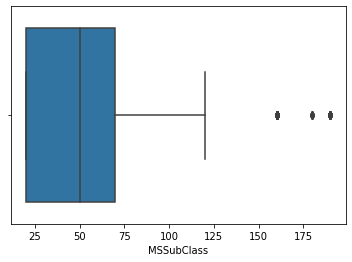

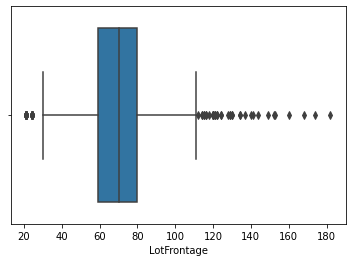

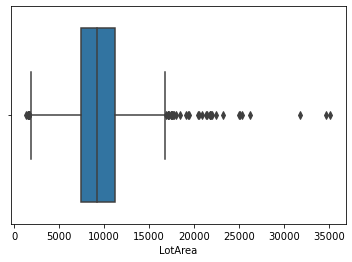

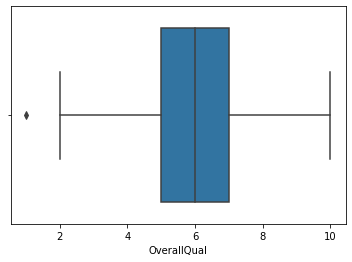

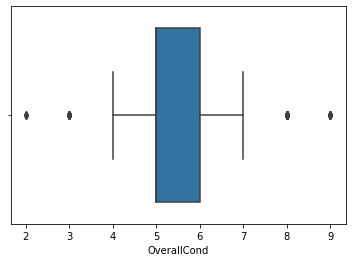

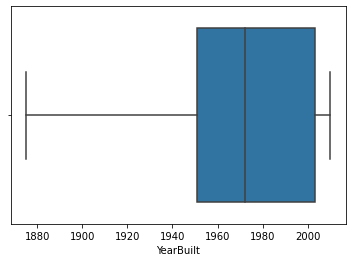

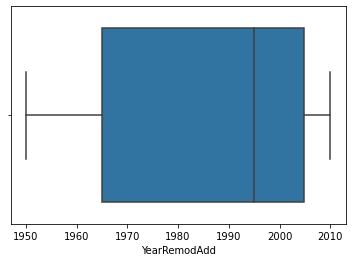

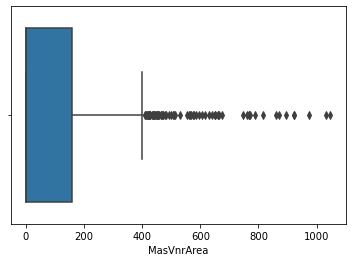

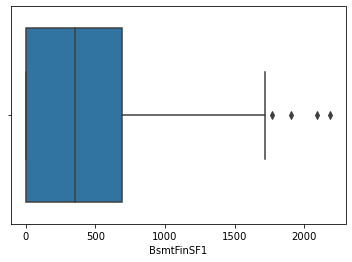

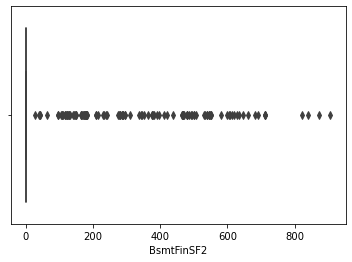

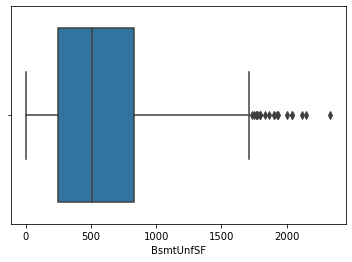

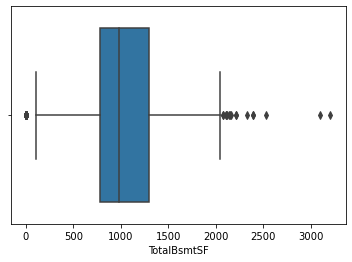

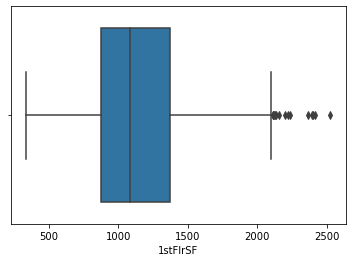

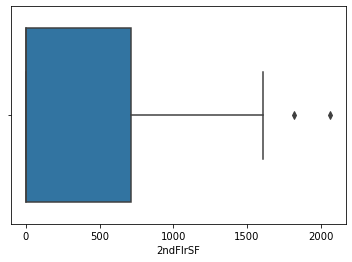

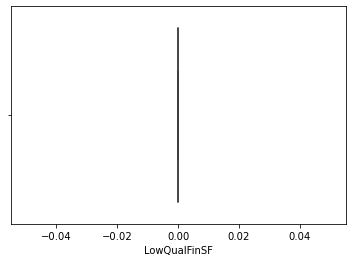

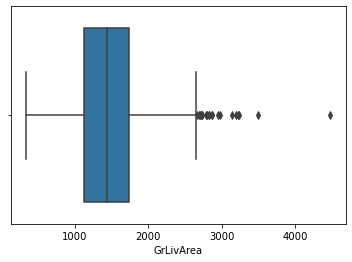

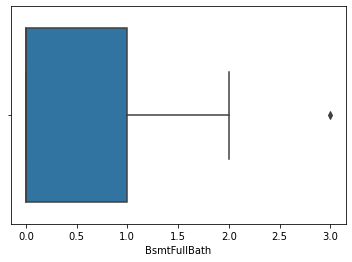

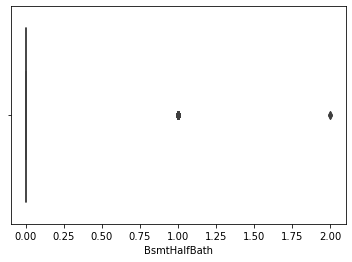

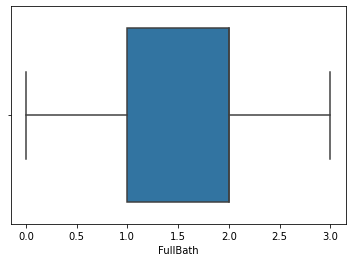

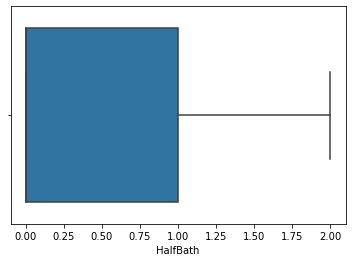

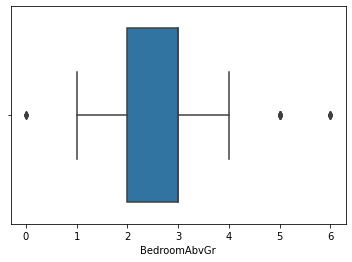

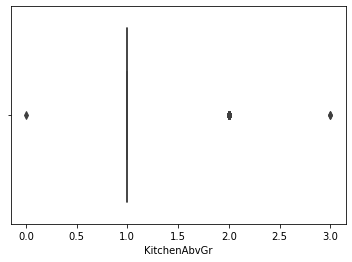

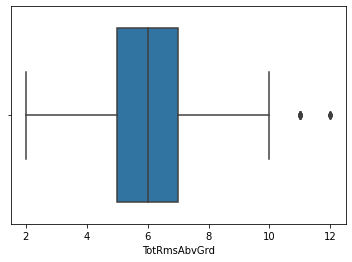

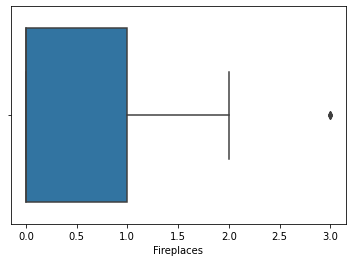

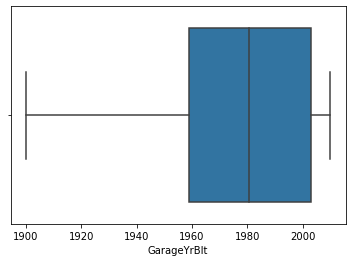

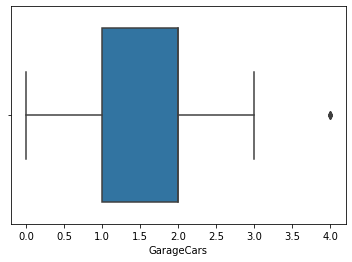

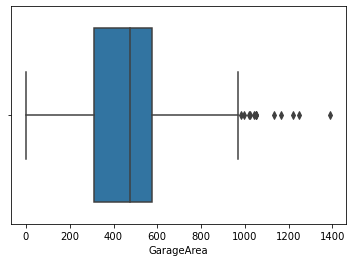

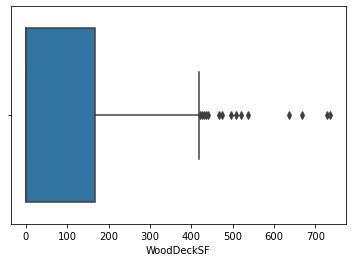

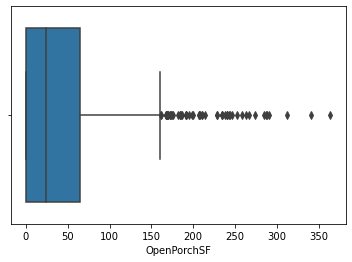

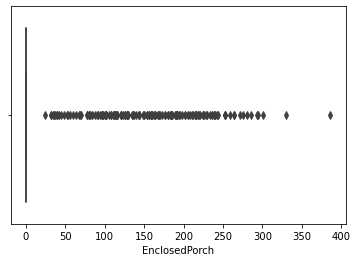

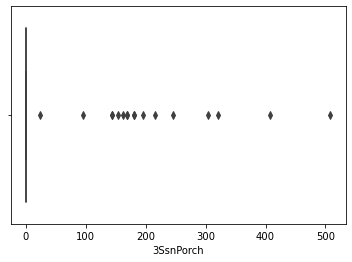

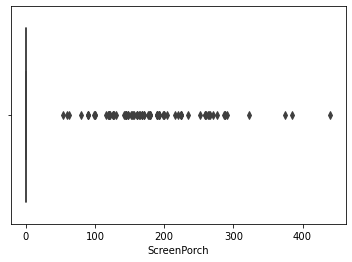

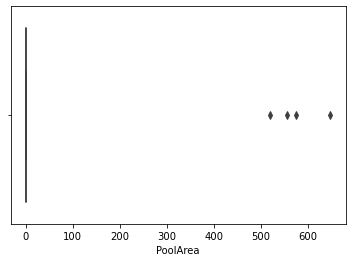

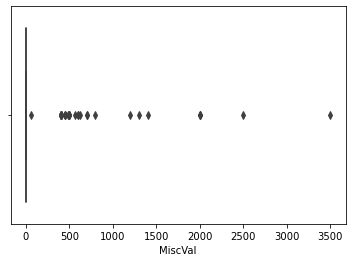

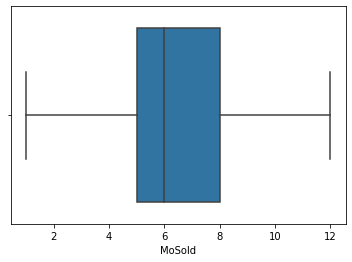

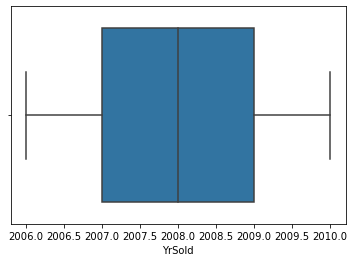

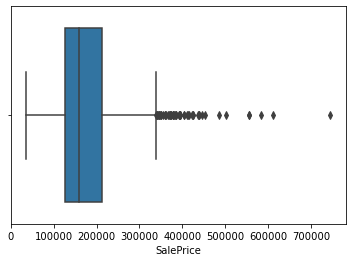

In [47]:
for c in col:
    sns.boxplot(price[c]) 
    plt.show();

In [48]:
price.Age = 2021 - price.YearBuilt # Converted year to Age of the building
price.Age

0        18
1        45
2        20
3       106
4        21
       ... 
1454     17
1455     22
1456     43
1457     80
1459     56
Name: YearBuilt, Length: 1146, dtype: int64

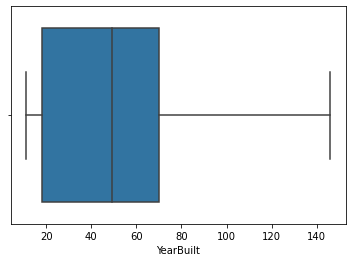

In [49]:
sns.boxplot(price.Age)

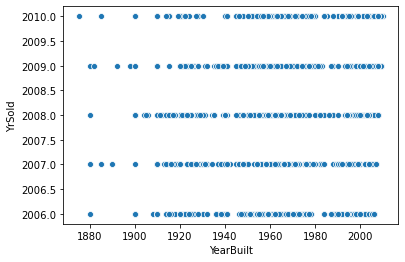

In [50]:
sns.scatterplot(data = price, x = 'YearBuilt', y = 'YrSold')

In [51]:
price = price.drop(['YearBuilt', 'YrSold'],1)

In [52]:
price = price.drop('GarageYrBlt',1)

In [53]:
price = price.drop(['Id','MasVnrType'], 1)

In [54]:
col = price.columns

In [55]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[col] = scaler.fit_transform(df_train[col])

In [57]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Others,SaleCondition_Partial
505,0.411765,0.242236,0.186091,0.375,0.428571,0.033333,0.343840,0.000000,0.0,0.410959,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
795,0.235294,0.304348,0.209854,0.500,0.571429,0.516667,0.124164,0.000000,0.0,0.278253,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
474,0.588235,0.124224,0.119114,0.750,0.428571,0.833333,0.000000,0.546618,0.0,0.127568,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
642,0.352941,0.335404,0.371235,0.750,0.714286,0.750000,0.000000,0.644424,0.0,0.232021,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,0.000000,0.273292,0.211332,0.625,0.428571,0.900000,0.254059,0.432358,0.0,0.209760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Others,SaleCondition_Partial
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,...,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,0.218865,0.301327,0.240759,0.510443,0.508016,0.578367,0.094974,0.188963,0.042099,0.252701,...,0.031172,0.273067,0.108479,0.503741,0.273067,0.088529,0.290524,0.481297,0.098504,0.105985
std,0.250547,0.135551,0.110969,0.171592,0.156392,0.356597,0.164332,0.199130,0.147992,0.191035,...,0.173891,0.445813,0.311178,0.500298,0.445813,0.284239,0.454287,0.499962,0.298181,0.308011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.236025,0.178842,0.375000,0.428571,0.250000,0.000000,0.000000,0.000000,0.108091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.298137,0.234845,0.500000,0.428571,0.750000,0.000000,0.157450,0.000000,0.220034,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.366460,0.295806,0.625000,0.571429,0.900000,0.150430,0.312729,0.000000,0.356485,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [60]:
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 30)
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 43),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 53),
 ('GarageCars', True, 1),
 ('GarageArea', False, 54),
 ('WoodDeckSF', False, 45),
 ('OpenPorchSF', False, 25),
 ('EnclosedPorch', False, 49),
 ('3SsnPorch', False, 32),
 ('ScreenPorch', False, 39),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 31),
 ('MSZoning_RL', False, 37),
 ('MSZoning_RM', False, 20),
 ('LotShape_Others', False, 7),
 ('LotShape_Reg', False, 34),
 

In [62]:
new_col = X_train.columns[rfe.support_]
new_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageCars', 'PoolArea', 'MiscVal', 'Neighborhood_OldTown',
       'RoofStyle_Others', 'ExterQual_Others', 'BsmtQual_Others',
       'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'KitchenQual_Others',
       'SaleCondition_Partial'],
      dtype='object')

In [63]:
lm = LinearRegression()

X_train = X_train[new_col]

lm.fit(X_train, y_train)

LinearRegression()

In [64]:
y_train_pred = lm.predict(X_train)


In [65]:
res = y_train - y_train_pred

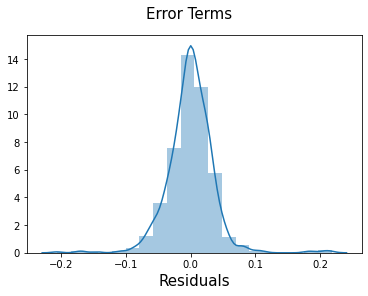

In [66]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.show()

In [67]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Others,SaleCondition_Partial
357,120,44.0,4224,5,5,1976,0.0,874,0,268,...,0,1,0,1,0,0,0,0,0,0
930,20,73.0,8925,8,5,2007,0.0,16,0,1450,...,0,0,0,0,0,0,0,0,0,0
909,60,149.0,12589,6,5,2005,0.0,0,0,742,...,0,0,0,0,0,0,0,0,0,0
204,50,50.0,3500,5,7,1950,0.0,312,0,408,...,0,1,0,1,1,0,0,1,0,0
1191,160,24.0,2645,8,5,2000,456.0,0,0,776,...,0,0,0,0,1,0,0,1,0,0


In [68]:

# create a var-list to transform, since we can only transform the test set. we need to just assume there is no data at all.
# since the scalling wont show any effect on categorical variables as they are already in between 0 and 1

df_test[col] = scaler.transform(df_test[col])


In [69]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Others,SaleCondition_Partial
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.213577,0.300430,0.240417,0.513808,0.507890,0.600775,0.092737,0.197261,0.036534,0.256271,...,0.037791,0.308140,0.093023,0.502907,0.293605,0.055233,0.281977,0.476744,0.087209,0.098837
std,0.259274,0.132779,0.112922,0.181080,0.150948,0.348978,0.150154,0.193165,0.133618,0.198472,...,0.190967,0.462397,0.290888,0.500720,0.456076,0.228766,0.450618,0.500186,0.282553,0.298878
min,0.000000,0.000000,0.005645,-0.125000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.236025,0.184960,0.375000,0.428571,0.316667,0.000000,0.000000,0.000000,0.103382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.304348,0.232569,0.500000,0.428571,0.750000,0.000000,0.174817,0.000000,0.210830,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.378882,0.282195,0.625000,0.571429,0.916667,0.153295,0.328154,0.000000,0.362800,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,0.795031,0.985724,1.000000,1.000000,1.000000,0.853868,0.775137,1.038991,0.828339,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
y_test = df_test.pop('SalePrice')    # pop out target variable from training set and assign it to y_test and the rest to X_test
X_test = df_test[new_col]


## Preparing the data for modelling:

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9046533375077978
0.8880498196570028
1.0333689997624111
0.3986377514117046
0.0012884900246414104
0.0011588306727084437


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression


In [73]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 2000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [75]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.02229496  0.03388426  0.02926978  0.12882029  0.03851584  0.02625424
  0.02799368  0.08025036  0.01397279  0.08602091  0.09247587  0.09534917
  0.09545674 -0.01233122  0.04691091  0.01900971 -0.04124757 -0.05101439
  0.02631134  0.02859984  0.0567382  -0.01716535 -0.0228329  -0.00925452
  0.03227778  0.03690654  0.01850378  0.01638486  0.02701571  0.02925161]


In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9027930158845284
0.8893638632529901
1.0535312020338479
0.3939586398394286
0.0013136299277230023
0.0011452286041843853


# Lasso

In [77]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [79]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [80]:
lasso.coef_

array([-0.02409665,  0.03212521,  0.02315346,  0.14664132,  0.03469498,
        0.02524142,  0.02362282,  0.07066986,  0.        ,  0.1074162 ,
        0.08961646,  0.0978589 ,  0.14443404, -0.00722479,  0.03724141,
        0.01284946, -0.04195988, -0.04542684,  0.0046981 ,  0.02297915,
        0.05674719, -0.        , -0.02272341, -0.00661818,  0.03141513,
        0.03557095,  0.0172808 ,  0.01384526,  0.02467768,  0.03015778])

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9036168717994308
0.8877483275895741
1.0446022354556976
0.39971131931003245
0.0013024965529372789
0.0011619515096221874


In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.904653,0.902793,0.903617
1,R2 Score (Test),0.888050,0.889364,0.887748
2,RSS (Train),1.033369,1.053531,1.044602
3,RSS (Test),0.398638,0.393959,0.399711
4,MSE (Train),0.035896,0.036244,0.036090
5,MSE (Test),0.034042,0.033841,0.034087


In [83]:
y_pred_test = lm.predict(X_test)

 # magnitude of residues.
res = y_test - y_pred_test

y_test['res'] = res

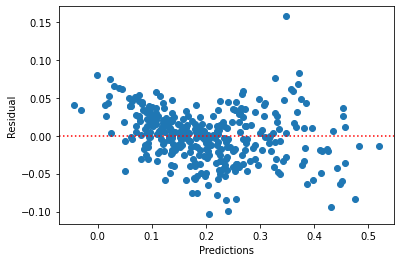

In [84]:
plt.scatter( y_pred_test , y_test['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

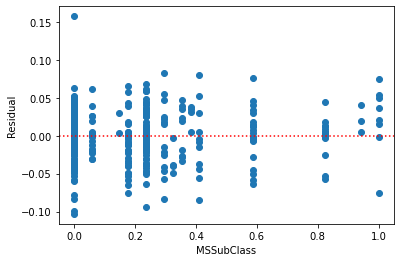

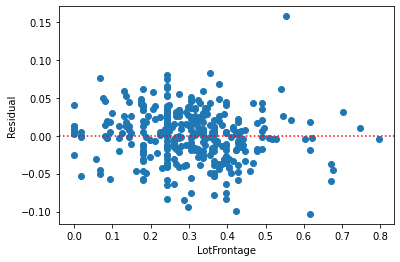

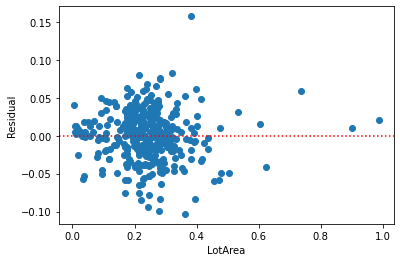

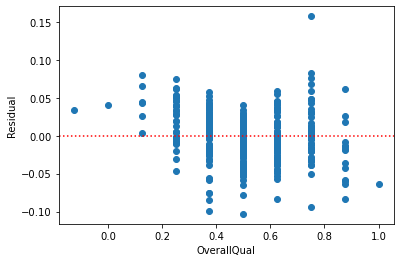

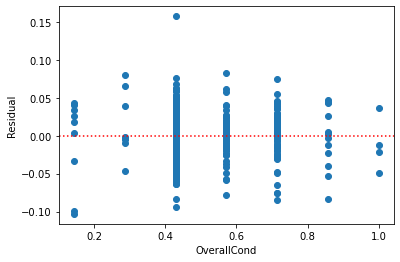

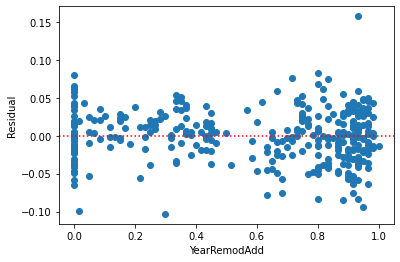

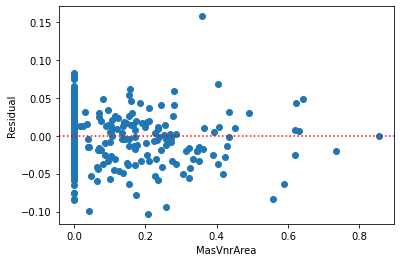

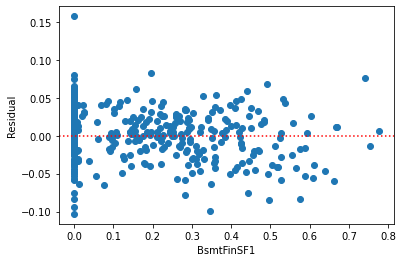

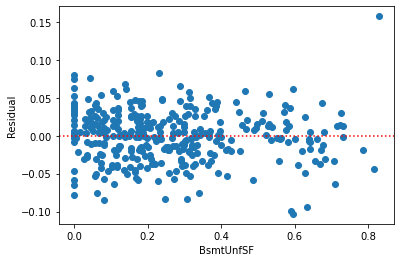

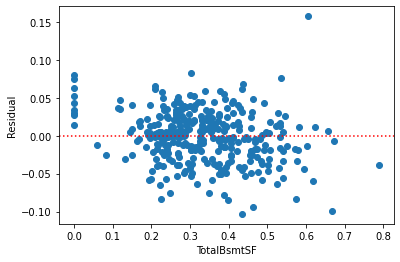

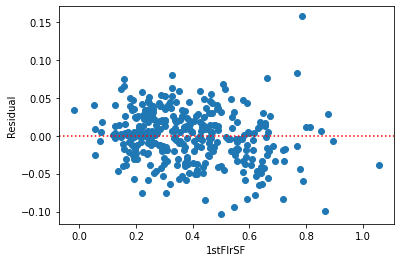

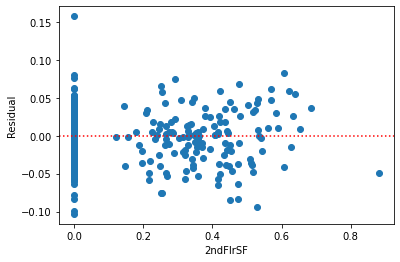

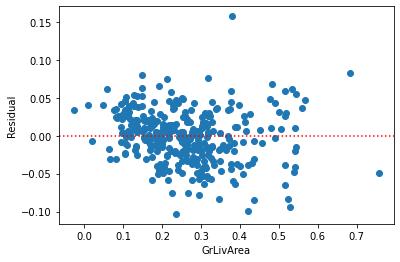

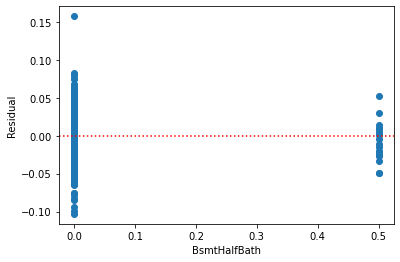

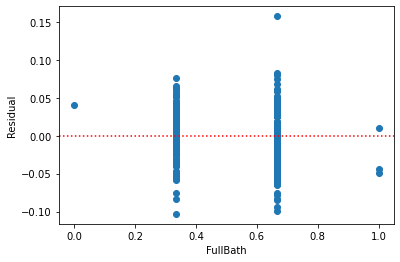

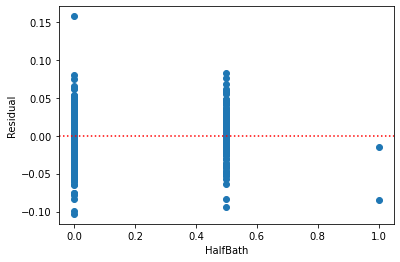

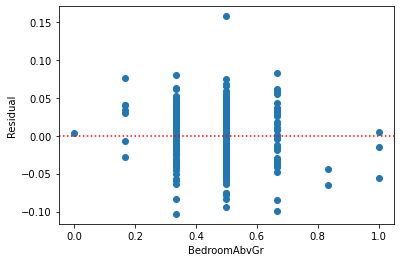

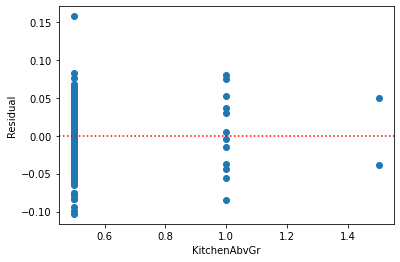

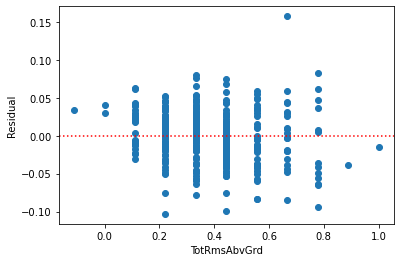

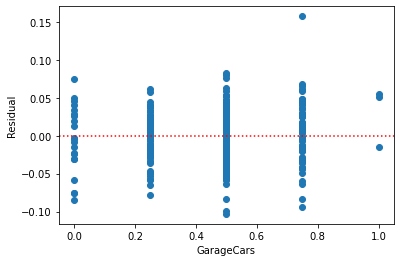

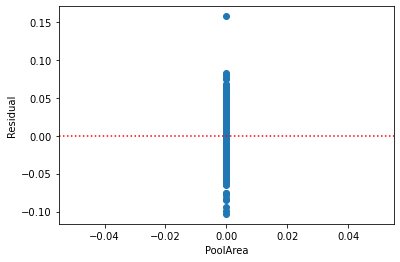

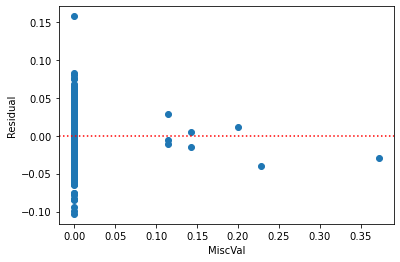

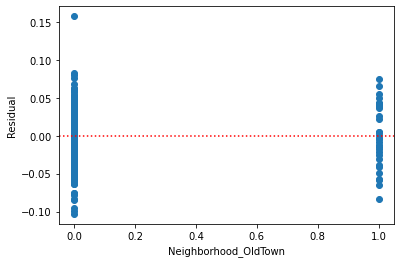

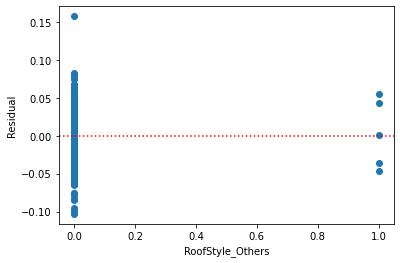

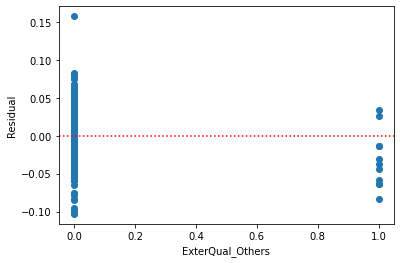

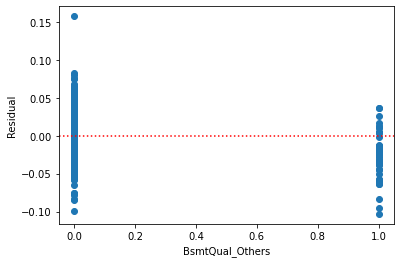

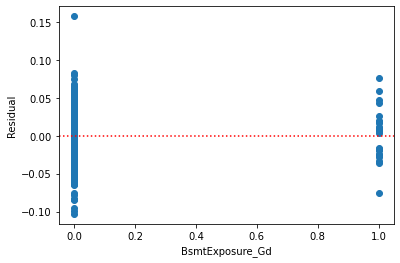

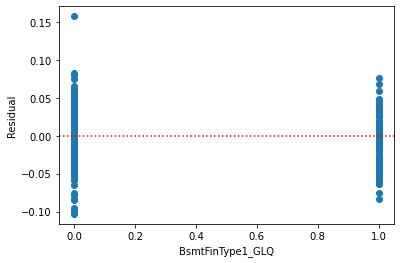

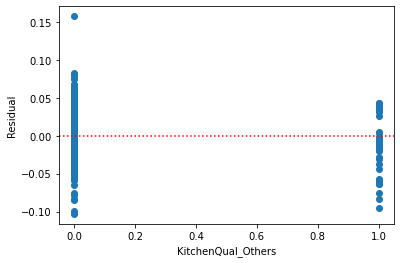

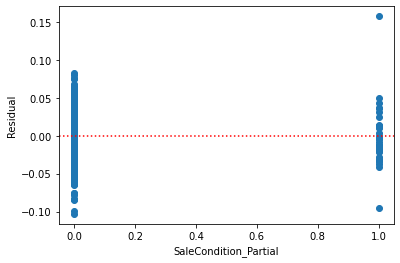

In [85]:
for c in new_col:
    plt.scatter(X_test[c] , y_test['res'])
    plt.axhline(y=0, color='r', linestyle=':')
    plt.xlabel(c)
    plt.ylabel("Residual")
    plt.show();
   

In [86]:
# just choose one feature which is symmetrical to Zero axis is the best variable..... 